# <font color="brown">House Price Prediction<font>
Made by Ethan D'Mello 
    
- Project ID: PRCP-1020-HousePricePred
- Team ID: PTID-CDS-JUN22-1323A
    
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 
    
    
    
https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# <font color="brown"> Overview <font>
    

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 

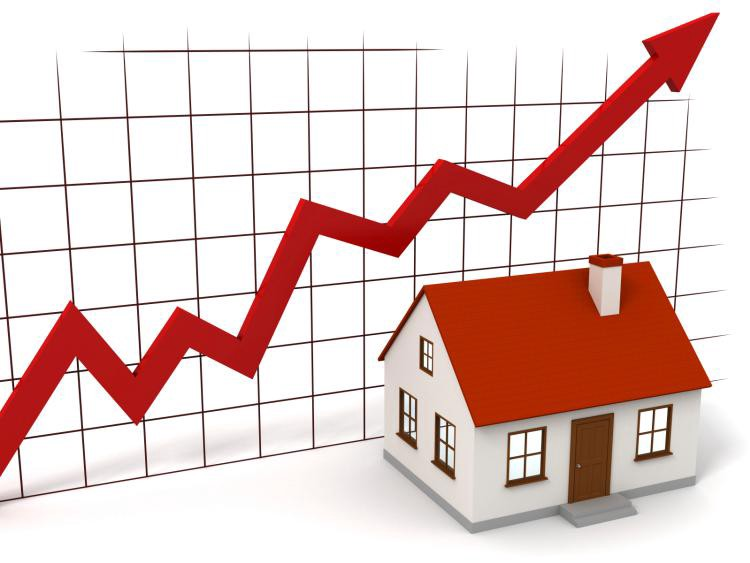

# <font color="brown">Predicting the price of a house<font>

Using Machine Learning and various data science libraries to build a model that can reliably predict if a person will have H1N1 and seasonal vaccine. We will use the following pipeline to create a reliable model:

- Problem Definition
- Data
- Evaluvation
- Features
- Modelling

# <font color="brown">Problem Definition<font>

> We have to predict the price of a house with the data given. We must do so with a reliable percentage of prediction.

# <font color="brown">Data<font>

Here's a brief version of what you'll find in the data description file.
- **SalePrice:** the property's sale price in dollars. This is the target variable that you're trying to predict.
- **MSSubClass:** The building class
- **MSZoning:** The general zoning classification
- **LotFrontage:** Linear feet of street connected to property
- **LotArea:** Lot size in square feet
- **Street:** Type of road access
- **Alley:** Type of alley access
- **LotShape:** General shape of property
- **LandContour:** Flatness of the property
- **Utilities:** Type of utilities available
- **LotConfig:** Lot configuration
- **LandSlope:** Slope of property
- **Neighborhood:** Physical locations within Ames city limits
- **Condition1:** Proximity to main road or railroad
- **Condition2:** Proximity to main road or railroad (if a second is present)
- **BldgType:** Type of dwelling
- **HouseStyle:** Style of dwelling
- **OverallQual:** Overall material and finish quality
- **OverallCond:** Overall condition rating
- **YearBuilt:** Original construction date
- **YearRemodAdd:** Remodel date
- **RoofStyle:** Type of roof
- **RoofMatl:** Roof material
- **Exterior1st:** Exterior covering on house
- **Exterior2nd:** Exterior covering on house (if more than one material)
- **MasVnrType:** Masonry veneer type
- **MasVnrArea:** Masonry veneer area in square feet
- **ExterQual:** Exterior material quality
- **ExterCond:** Present condition of the material on the exterior
- **Foundation:** Type of foundation
- **BsmtQual:** Height of the basement
- **BsmtCond:** General condition of the basement
- **BsmtExposure:** Walkout or garden level basement walls
- **BsmtFinType1:** Quality of basement finished area
- **BsmtFinSF1:** Type 1 finished square feet
- **BsmtFinType2:** Quality of second finished area (if present)
- **BsmtFinSF2:** Type 2 finished square feet
- **BsmtUnfSF:** Unfinished square feet of basement area
- **TotalBsmtSF:** Total square feet of basement area
- **Heating:** Type of heating
- **HeatingQC:** Heating quality and condition
- **CentralAir:** Central air conditioning
- **Electrical:** Electrical system
- **1stFlrSF:** First Floor square feet
- **2ndFlrSF:** Second floor square feet
- **LowQualFinSF:** Low quality finished square feet (all floors)
- **GrLivArea:** Above grade (ground) living area square feet
- **BsmtFullBath:** Basement full bathrooms
- **BsmtHalfBath:** Basement half bathrooms
- **FullBath:** Full bathrooms above grade
- **HalfBath:** Half baths above grade
- **Bedroom:** Number of bedrooms above basement level
- **Kitchen:** Number of kitchens
- **KitchenQual:** Kitchen quality
- **TotRmsAbvGrd:** Total rooms above grade (does not include bathrooms)
- **Functional:** Home functionality rating
- **Fireplaces:** Number of fireplaces
- **FireplaceQu:** Fireplace quality
- **GarageType:** Garage location
- **GarageYrBlt:** Year garage was built
- **GarageFinish:** Interior finish of the garage
- **GarageCars:** Size of garage in car capacity
- **GarageArea:** Size of garage in square feet
- **GarageQual:** Garage quality
- **GarageCond:** Garage condition
- **PavedDrive:** Paved driveway
- **WoodDeckSF:** Wood deck area in square feet
- **OpenPorchSF:** Open porch area in square feet
- **EnclosedPorch:** Enclosed porch area in square feet
- **3SsnPorch:** Three season porch area in square feet
- **ScreenPorch:** Screen porch area in square feet
- **PoolArea:** Pool area in square feet
- **PoolQC:** Pool quality
- **Fence:** Fence quality
- **MiscFeature:** Miscellaneous feature not covered in other categories
- **MiscVal:** Value of miscellaneous feature
- **MoSold:** Month Sold
- **YrSold:** Year Sold
- **SaleType:** Type of sale
- **SaleCondition:** Condition of sale

### Setting up the tools

In [2]:
# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder , OneHotEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from scipy import stats

### Dataset

In [3]:
df = pd.read_csv(r'C:\Users\ethan\Documents\CDS\Project[Internship]\PRCP-1020-HousePricePred\data.csv')
df
## it has 81 columns

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
subclass = { 'MSSubClass' : [] ,'MSZoning' : [],'LotFrontage': [],'LotArea' : [],'Street': [],'Alley': [],'LotShape': [],
    'LandContour': [],'Utilities': [],'LotConfig': [],'LandSlope': [],'Neighborhood': [],'Condition1': [],'Condition2': [],'BldgType': [],
    'HouseStyle': [],'OverallQual': [],'OverallCond': [],'YearBuilt': [],'YearRemodAdd': [],'RoofStyle': [],'RoofMatl': [],
    'Exterior1st': [],'Exterior2nd' : [],'MasVnrType': [],'MasVnrArea': [],'ExterQual': [],'ExterCond': [],'Foundation': [],
    'BsmtQual': [],'BsmtCond': [],'BsmtExposure': [],'BsmtFinType1': [],'BsmtFinSF1': [],'BsmtFinType2': [],'BsmtFinSF2': [],'BsmtUnfSF': [],
    'TotalBsmtSF': [],'Heating': [],'HeatingQC': [],'CentralAir': [],'Electrical': [],'1stFlrSF': [],'2ndFlrSF': [],'LowQualFinSF': [],
    'GrLivArea': [],'BsmtFullBath': [],'BsmtHalfBath': [],'FullBath': [],'HalfBath': [],'BedroomAbvGr': [],'KitchenAbvGr': [],
    'KitchenQual': [],'TotRmsAbvGrd': [],'Functional': [],'Fireplaces': [],'FireplaceQu': [],'GarageType': [],'GarageYrBlt': [],
    'GarageFinish': [],'GarageCars': [],'GarageArea': [],'GarageQual': [],'GarageCond': [],'PavedDrive': [],'WoodDeckSF': [],
    'OpenPorchSF': [],'EnclosedPorch': [],'3SsnPorch': [],'ScreenPorch': [],'PoolArea': [],'PoolQC': [],'Fence': [],
    'MiscFeature': [],'MiscVal': [],'MoSold': [],'YrSold': [],'SaleType': [],'SaleCondition': [],
    'SalePrice': []

}
column_list= ['MSSubClass','MSZoning' ,'LotFrontage','LotArea','Street','Alley','LotShape','LandContour','Utilities','LotConfig',
              'LandSlope','Neighborhood','Condition1','Condition2','BldgType','HouseStyle','OverallQual','OverallCond','YearBuilt','YearRemodAdd',
                'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','MasVnrArea','ExterQual','ExterCond',
    'Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinSF1','BsmtFinType2','BsmtFinSF2','BsmtUnfSF',
    'TotalBsmtSF','Heating','HeatingQC','CentralAir','Electrical','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','BsmtFullBath','BsmtHalfBath',
    'FullBath','HalfBath','BedroomAbvGr','KitchenAbvGr','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','FireplaceQu',
    'GarageType','GarageYrBlt','GarageFinish','GarageCars','GarageArea','GarageQual','GarageCond','PavedDrive','WoodDeckSF',
    'OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','PoolQC','Fence','MiscFeature','MiscVal','MoSold',
    'YrSold','SaleType','SaleCondition','SalePrice' ]
for data in column_list:
    subclass[data] = df[data].unique()

In [5]:
subclass

{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
         91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
         74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
         81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
         77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
         92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
         67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
         87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
         38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
        114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
         46.]),
 'LotArea': array([ 8450,  9600, 11250

### Checking data 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Renaming the data 

In [8]:
df.rename( columns = {'MSSubClass' : 'MSsub' ,'MSZoning' : 'MSZon' ,'LotFrontage': 'LF' ,'LotArea' : 'LA' ,'Street': 'Street' ,
'Alley': 'Alley' ,'LotShape': 'Lot' ,'LandContour': 'LCont' ,'Utilities': 'Uti','LotConfig': 'LConf','LandSlope': 'LS',
'Neighborhood': 'Neigh','Condition1': 'Cond1','Condition2': 'Cond2','BldgType': 'BldgType','HouseStyle': 'HStyle','OverallQual': 'OvQual','OverallCond': 'OvCond','YearBuilt': 'YB' ,'YearRemodAdd': 'YRemodAdd',
'RoofStyle':'RoS','RoofMatl': 'RoM','Exterior1st': 'Ext1','Exterior2nd' : 'Ext2','MasVnrType': 'MasVnrType',
'MasVnrArea': 'MasVnrArea','ExterQual': 'ExQu','ExterCond': 'ExCond','Foundation': 'Found', 'BsmtQual': 'BsmtQ',
'BsmtCond': 'BsmtC','BsmtExposure': 'BsmtExpo','BsmtFinType1': 'BsmtFin1','BsmtFinSF1': 'BsmtFinSF1','BsmtFinType2': 'BsmtFin2',
'BsmtFinSF2': 'BsmtFinSF2','BsmtUnfSF': 'BsmtUnfSF','TotalBsmtSF': 'TBsmtSF','Heating': 'Heat' ,'HeatingQC': 'HeatQC',
'CentralAir': 'CA','Electrical': 'Elec','1stFlrSF': '1FlrSF','2ndFlrSF': '2FlrSF','LowQualFinSF': 'LQfinSF',
'GrLivArea': 'GrLA','BsmtFullBath': 'BsmtFB', 'BsmtHalfBath': 'BsmtHB','FullBath': 'FB','HalfBath': 'HB','BedroomAbvGr':'BedAG',
'KitchenAbvGr': 'KitcAG','KitchenQual':'KitchQual','TotRmsAbvGrd':'TRAG','Functional': 'Func','Fireplaces':'Fire',
'FireplaceQu': 'FireQ','GarageType': 'GT','GarageYrBlt': 'GYblt','GarageFinish': 'GF','GarageCars': 'GC','GarageArea': 'GA',
'GarageQual': 'GQ', 'GarageCond': 'GCond','PavedDrive': 'PavedDrive','WoodDeckSF': 'WoodDeckSF','OpenPorchSF': 'OPSF',
'EnclosedPorch': 'EP','3SsnPorch':'3SsnPorch' ,'ScreenPorch': 'SP','PoolArea': 'PA','PoolQC': 'PQC','Fence':'Fence',
'MiscFeature': 'MiscFeature','MiscVal': 'MiscVal', 'MoSold': 'MoSold','YrSold': 'YrSold','SaleType': 'SaleType',
'SaleCondition': 'SaleCondition','SalePrice': 'target'
} , inplace = True )

In [9]:
df

,Id,MSsub,MSZon,LF,LA,Street,Alley,Lot,LCont,Uti,...,PA,PQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


### Dropping values

##### Alley

Before imputing values we must drop Alley column, this is because 60-90% of all the data is NULL hence it is not an important feature

In [10]:
df['Alley'].value_counts()

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [11]:
df.drop(['Alley'],axis = 1, inplace = True)
#df.Alley has been dropped

##### Fence

In [12]:
#check value counts for Fence
df['Fence'].value_counts()

MnPrv    157
GdPrv     59
GdWo      54
MnWw      11
Name: Fence, dtype: int64

In [13]:
df.drop(['Fence'], axis=1 , inplace = True)

##### PoolQC

In [14]:
#check value counts for PQC
df['PQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PQC, dtype: int64

In [15]:
df.drop(['PQC'],axis=1 , inplace = True)

##### MiscFeature

In [16]:
df['MiscFeature'].value_counts()

Shed    49
Othr     2
Gar2     2
TenC     1
Name: MiscFeature, dtype: int64

In [17]:
df.drop(['MiscFeature'],axis=1 , inplace = True)

### Imputing missing values

In [18]:
column_list = [ 'MSsub' ,'MSZon' ,'LF' ,'LA' ,'Street' ,'Lot' ,'LCont' ,'Uti','LConf','LS','Neigh','Cond1','Cond2',
           'BldgType','HStyle','OvQual','OvCond','YB' ,'YRemodAdd','RoS','RoM','Ext1','Ext2','MasVnrType','MasVnrArea','ExQu',
           'ExCond','Found','BsmtQ','BsmtC','BsmtExpo','BsmtFin1','BsmtFinSF1','BsmtFin2','BsmtFinSF2','BsmtUnfSF','TBsmtSF',
           'Heat' ,'HeatQC','CA','Elec','1FlrSF','2FlrSF','LQfinSF','GrLA','BsmtFB', 'BsmtHB','FB','HB','BedAG','KitcAG',
           'KitchQual','TRAG','Func','Fire','FireQ','GT','GYblt','GF','GC','GA','GQ', 'GCond', 'PavedDrive','WoodDeckSF',
           'OPSF','EP','3SsnPorch' ,'SP','PA','MiscVal', 'MoSold','YrSold','SaleType',
           'SaleCondition','target' ]

def imputing_values(df):
    for data in column_list: 
        df[data] = df[data].fillna(df[data].mode()[0])
        
df

,Id,MSsub,MSZon,LF,LA,Street,Lot,LCont,Uti,LConf,...,EP,3SsnPorch,SP,PA,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


##### Checking for missing values

In [19]:
still_Null = []
for data in column_list:
    if df[data].isnull().sum() > 0:
        still_Null.append(data)

still_Null

['LF',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQ',
 'BsmtC',
 'BsmtExpo',
 'BsmtFin1',
 'BsmtFin2',
 'Elec',
 'FireQ',
 'GT',
 'GYblt',
 'GF',
 'GQ',
 'GCond']

In [20]:
for data in still_Null:
    df[data]= df[data].fillna(df[data].value_counts().index[0])

### Setting up list of columns

In [21]:
#list of all Categorical values
column_list_categoricalvalues = []
i=0
for data in column_list:
    if df[data].dtype == 'object' :
        column_list_categoricalvalues.append(data)
        i+=1

In [22]:
column_list_categoricalvalues

['MSZon',
 'Street',
 'Lot',
 'LCont',
 'Uti',
 'LConf',
 'LS',
 'Neigh',
 'Cond1',
 'Cond2',
 'BldgType',
 'HStyle',
 'RoS',
 'RoM',
 'Ext1',
 'Ext2',
 'MasVnrType',
 'ExQu',
 'ExCond',
 'Found',
 'BsmtQ',
 'BsmtC',
 'BsmtExpo',
 'BsmtFin1',
 'BsmtFin2',
 'Heat',
 'HeatQC',
 'CA',
 'Elec',
 'KitchQual',
 'Func',
 'FireQ',
 'GT',
 'GF',
 'GQ',
 'GCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

### Changing categorical values into numerical 

In [23]:
#Label encoding does not work
#for data in column_list:
    #if df[data].type() != 'int64':
       # le = LabelEncoder()
       # label = le.fit_transform(df[data])
       # df[data] = label 

In [24]:
subclass

{'MSSubClass': array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
        180,  40], dtype=int64),
 'MSZoning': array(['RL', 'RM', 'C (all)', 'FV', 'RH'], dtype=object),
 'LotFrontage': array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
         91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
         74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
         81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
         77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
         92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
         67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
         87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
         38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
        114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
         46.]),
 'LotArea': array([ 8450,  9600, 11250

In [25]:
#### We will use hot one encoding
for data in column_list_categoricalvalues:
    df[data] = df[data].astype('category')
    df[data] = df[data].cat.codes

enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(df[column_list_categoricalvalues]).toarray())
 
#Merge with main
df


,Id,MSsub,MSZon,LF,LA,Street,Lot,LCont,Uti,LConf,...,EP,3SsnPorch,SP,PA,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,3,3,0,4,...,0,0,0,0,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,3,3,0,4,...,0,0,0,0,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,3,3,0,4,...,0,0,0,0,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,3,3,0,4,...,112,0,0,0,0,4,2010,8,4,142125


# <font color="brown">Evaluvation<font>

### Exploratory Data Analysis
We will perform only heatmap in this analysis dude to the large scope of the project.

In [26]:
graph_list = ['LF', 'LA' , 'Neigh' , 'OvCond' , 'YB', 'YRemodAdd' , 'MasVnrArea', 'Found', 'BsmtFinSF1' , 'TBsmtSF' ,'1FlrSF' , 'GrLA' , 'FB' , 'TRAG' , ' GYbit' , 'GC' , 'GA' ]

In [27]:
# due to lack of resources and the length of the project, the following takes too long to run.
#for data in graph_list:
#    pd.crosstab(df[data] , df['target']).plot(kind="bar")
#    plt.ylabel('Number in total')
#    plt.xlabel(data)

[]

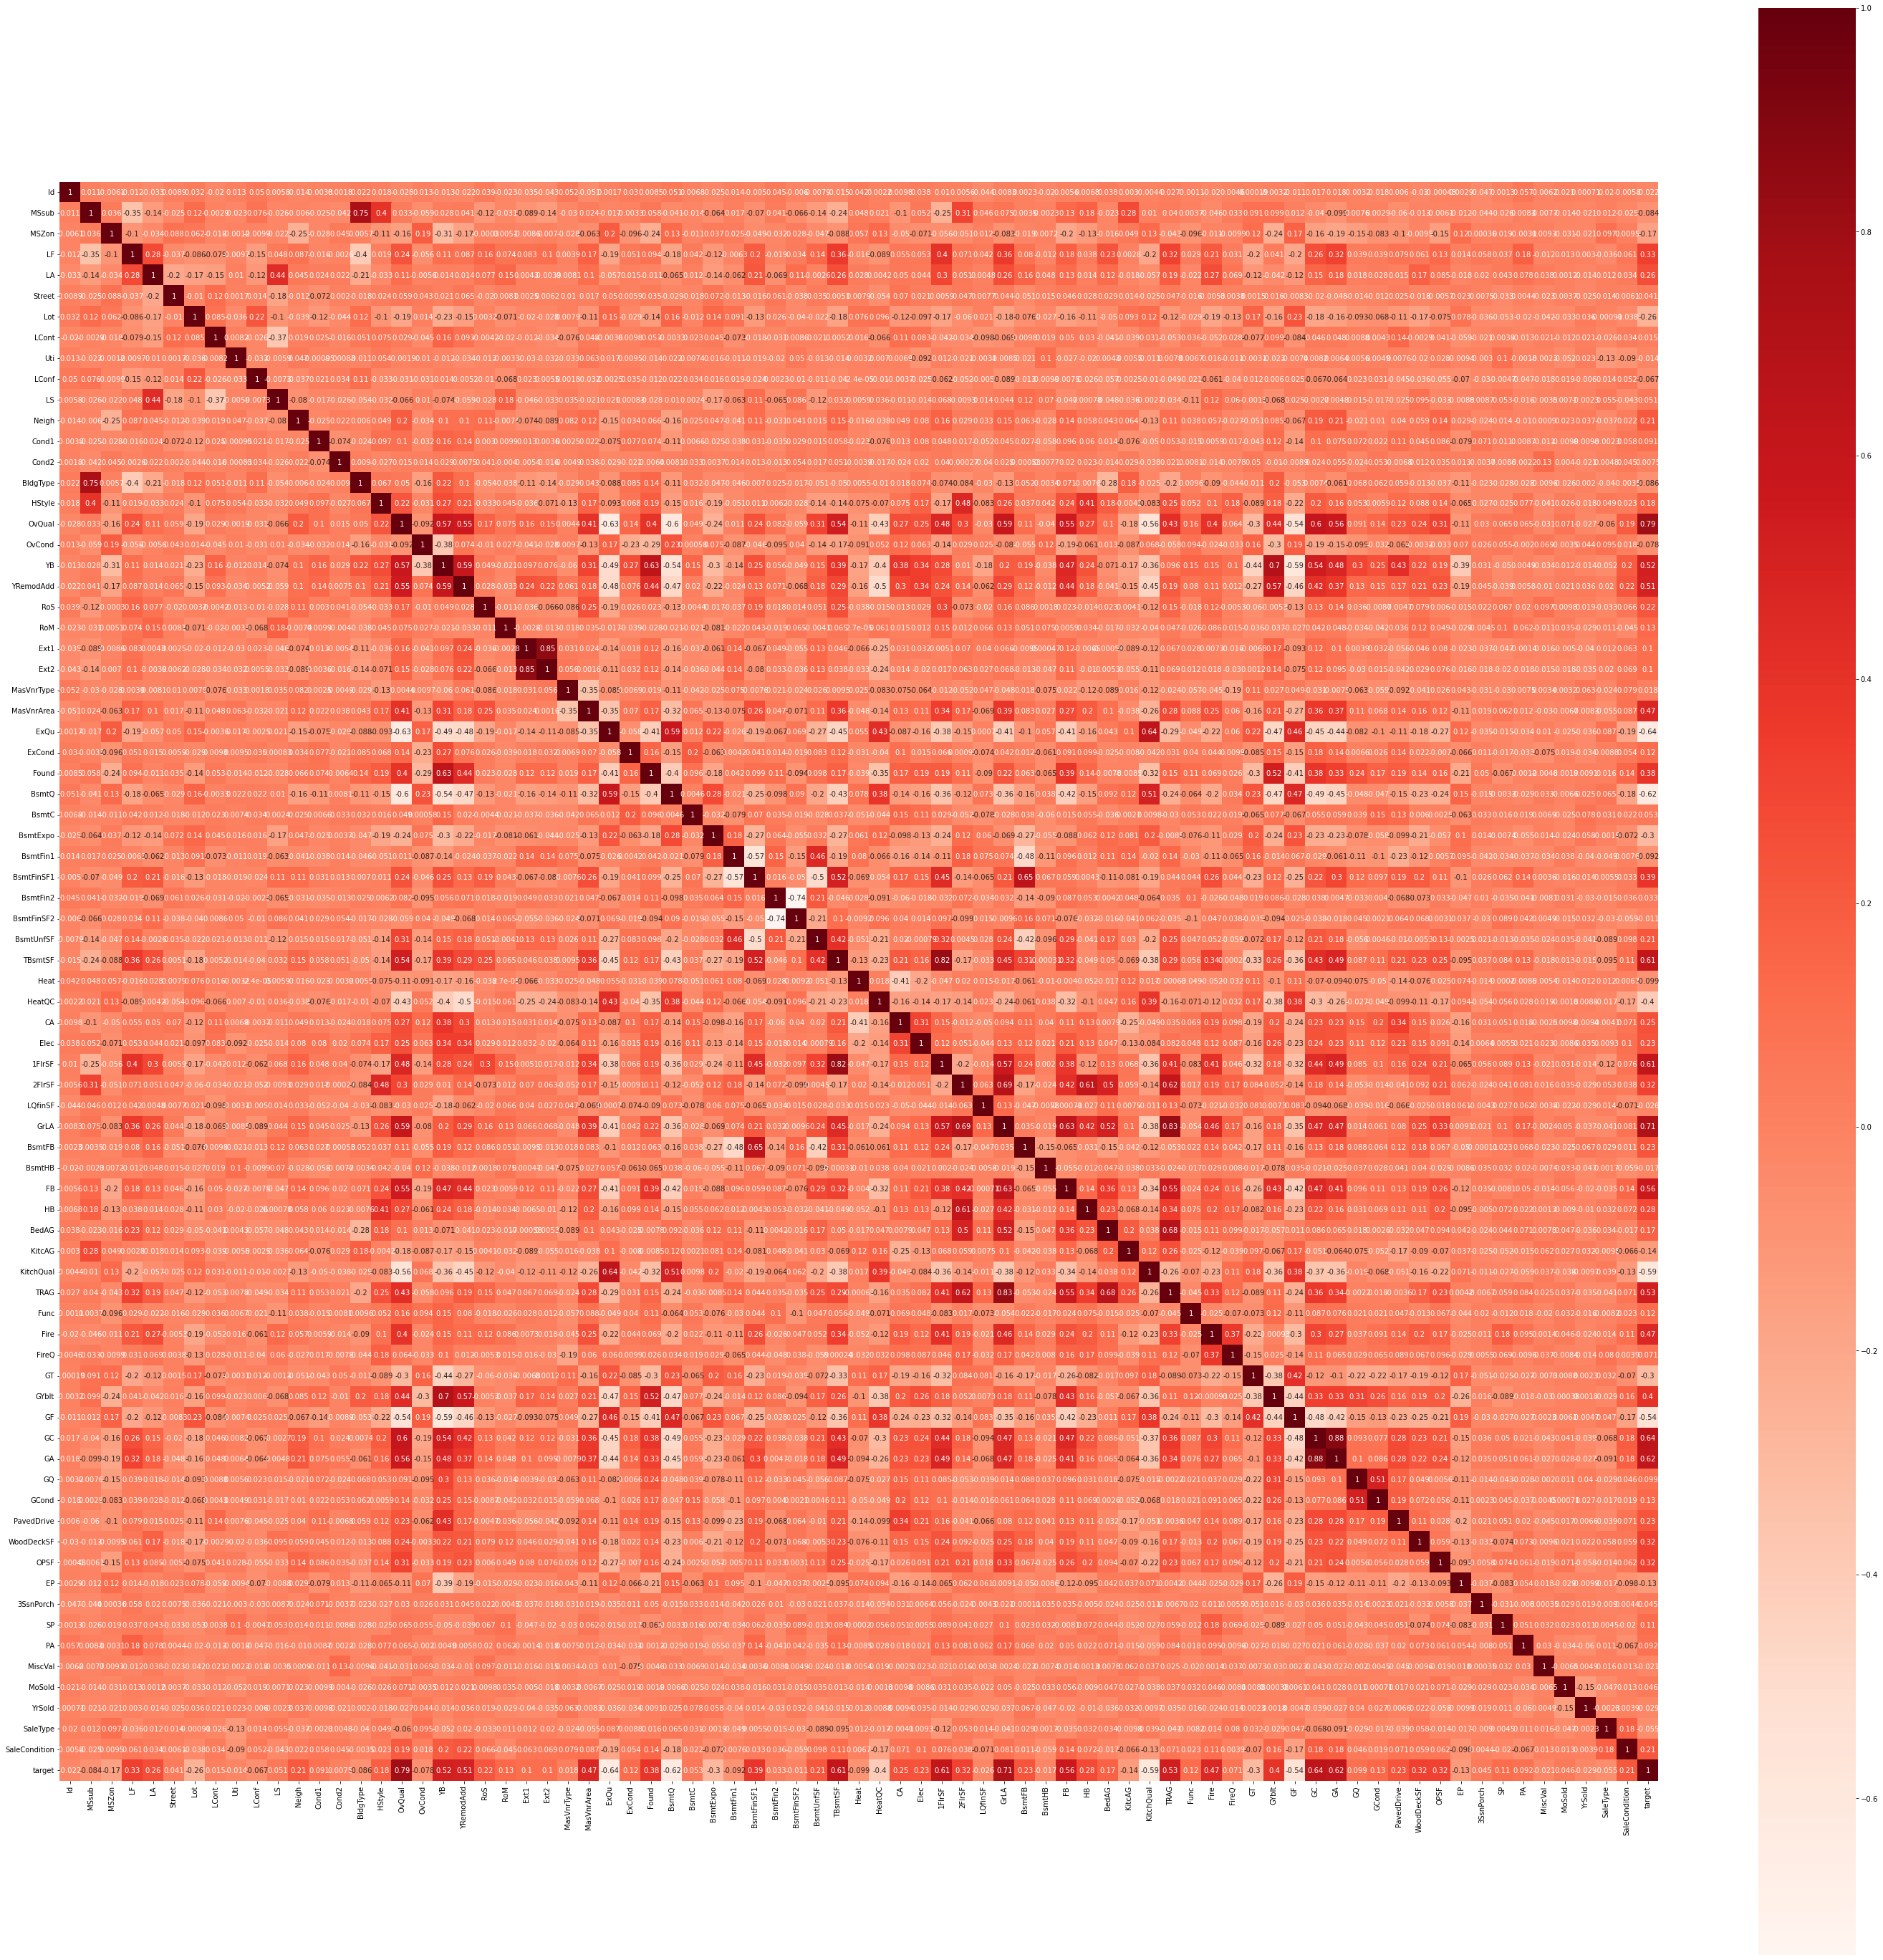

In [28]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True)
plt.plot()

# <font color="brown">Features<font>

We have to drop the id column

In [29]:
df.drop(['Id'], axis=1 , inplace = True )

In [30]:
df

,MSsub,MSZon,LF,LA,Street,Lot,LCont,Uti,LConf,LS,...,EP,3SsnPorch,SP,PA,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
0,60,3,65.0,8450,1,3,3,0,4,0,...,0,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,...,0,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,3,62.0,7917,1,3,3,0,4,0,...,0,0,0,0,0,8,2007,8,4,175000
1456,20,3,85.0,13175,1,3,3,0,4,0,...,0,0,0,0,0,2,2010,8,4,210000
1457,70,3,66.0,9042,1,3,3,0,4,0,...,0,0,0,0,2500,5,2010,8,4,266500
1458,20,3,68.0,9717,1,3,3,0,4,0,...,112,0,0,0,0,4,2010,8,4,142125


In [31]:
df.corr()

,MSsub,MSZon,LF,LA,Street,Lot,LCont,Uti,LConf,LS,...,EP,3SsnPorch,SP,PA,MiscVal,MoSold,YrSold,SaleType,SaleCondition,target
MSsub,1.000000,0.035900,-0.349116,-0.139781,-0.024969,0.119289,-0.002940,-0.022844,0.075910,-0.025672,...,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,0.012464,-0.024940,-0.084284
MSZon,0.035900,1.000000,-0.101150,-0.034452,0.087654,0.061887,-0.017854,-0.001192,-0.009895,-0.022055,...,0.115509,0.000362,0.019089,-0.003128,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.166872
LF,-0.349116,-0.101150,1.000000,0.281283,-0.037078,-0.085906,-0.078725,-0.009684,-0.146475,0.047801,...,0.014349,0.057826,0.036907,0.177999,-0.012274,0.012785,0.003021,-0.035773,0.061393,0.329220
LA,-0.139781,-0.034452,0.281283,1.000000,-0.197131,-0.165315,-0.149083,0.010123,-0.121161,0.436868,...,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.012292,0.034169,0.263843
Street,-0.024969,0.087654,-0.037078,-0.197131,1.000000,-0.010224,0.115995,0.001682,0.013960,-0.179360,...,0.023082,0.007473,-0.033160,0.004413,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.041036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,-0.013585,-0.031496,0.012785,0.001205,0.003690,-0.033455,-0.011599,-0.051552,0.018902,0.007072,...,-0.028887,0.029474,0.023217,-0.033737,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.046432
YrSold,-0.021407,-0.020628,0.003021,-0.014261,-0.025043,0.036449,0.020507,0.023353,-0.005992,-0.002305,...,-0.009916,0.018645,0.010694,-0.059689,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.028923
SaleType,0.012464,0.097437,-0.035773,0.012292,0.014339,-0.000911,-0.025754,-0.126770,0.014325,0.054858,...,-0.016731,-0.009034,0.004533,0.011009,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.054911
SaleCondition,-0.024940,0.009494,0.061393,0.034169,0.006064,-0.038118,0.033809,-0.089701,0.051579,-0.043095,...,-0.098388,0.004379,-0.020095,-0.067251,0.013027,0.013320,0.003880,0.184067,1.000000,0.213092


# <font color="brown">Modelling<font>

### Setting up training and testing data

In [32]:
x=df.drop(['target'], axis= 1)
y=df['target']

In [33]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3 , random_state= 42 )

### Testing the Models 

In [34]:
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

def fit_and_score(models, x_train, x_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(x_train, y_train)
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models, x_train=x_train, x_test=x_test, y_train = y_train, y_test = y_test)
model_scores

{'Logistic Regression': 0.00684931506849315,
 'KNN': 0.0045662100456621,
 'Random Forest': 0.0091324200913242}

### Hyperparameter tuning

Maximum KNN Score on the test data: 0.68%


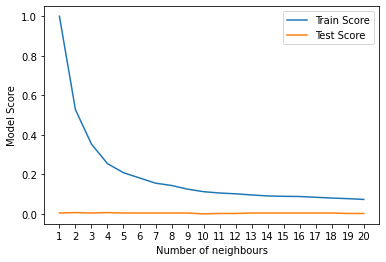

In [35]:
#using elbow method we can increase the efficiency 
train_scores = []
test_scores =[]
neighbors = range(1,21)
knn= KNeighborsClassifier() 

for i in neighbors:
    knn.set_params(n_neighbors = i)
    knn.fit(x_train, y_train)
    train_scores.append(knn.score(x_train, y_train))
    test_scores.append(knn.score(x_test,y_test))
    
plt.plot(neighbors, train_scores, label="Train Score")
plt.plot(neighbors, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighbours")
plt.ylabel("Model Score")
plt.legend()

print(f"Maximum KNN Score on the test data: {max(test_scores)*100:.2f}%")

#### With randomised search 
- Logistic Regression( )
- RandomForest Classifier( ) 

In [39]:
log_reg_grid = {"C":np.logspace(-4, 4, 20),"solver":["liblinear"]}
rf_grid = {"n_estimators":np.arange(10,1000, 50), "max_depth":[None, 3, 5,10],"min_samples_split":np.arange(2, 20, 2), 
           "min_samples_leaf":np.arange(1, 20, 2)}
np.random.seed(42)
rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.4min finished


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [40]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.00026366508987303583}

In [41]:
rs_log_reg.score(x_test, y_test)

0.0045662100456621

In [42]:
np.random.seed(42)
rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid,cv=5, n_iter=20,verbose=True)
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  2.2min finished


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [43]:
rs_rf.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [44]:
rs_rf.score(x_test, y_test)

0.02054794520547945

#### GridSearch

In [46]:
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}
gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed: 15.4min finished


In [47]:
gs_log_reg.best_params_

{'C': 0.00026366508987303583, 'solver': 'liblinear'}

In [48]:
gs_log_reg.score(x_test, y_test)

0.0045662100456621

### ROC curve and AUC score

In [49]:
y_preds = gs_log_reg.predict(x_test)

In [50]:
#checking prediction
y_preds

array([135000, 290000, 110000, 128000, 440000,  52000, 197900, 148500,
       123500, 185000, 135000, 106500, 198900, 224900, 174000, 135000,
       195000, 100000, 110000, 180000, 139000, 186500, 173000,  88000,
       227000, 148000, 181000, 110000, 174000, 196000, 145000, 354000,
       200000, 135000, 235128, 181500, 130000, 195000, 207500,  82000,
       103000, 226000, 139000, 248328, 156000, 234000, 117500, 132500,
       272000, 135000, 102000, 316600,  98000, 237500, 149300, 217000,
       140000, 141000, 140000,  72500,  76000, 139000, 275500, 227680,
       152000, 237500, 135000, 290000,  84500,  89500, 118964, 139000,
       110000,  90000, 395192, 264561, 290000, 354000, 130000, 138500,
       158900, 110000, 198900, 116000, 137000, 234000, 252000, 132500,
       149300, 172785, 213500, 154000, 141000, 294000, 216837, 181000,
       185000, 140000, 189000, 187000, 167000, 225000, 301500,  73000,
       170000, 167000, 147000, 213500, 120500, 219500, 100000, 118000,
      

In [51]:
y_test

892     154500
1105    325000
413     115000
522     159000
1036    315500
         ...  
331     139000
323     126175
650     205950
439     110000
798     485000
Name: target, Length: 438, dtype: int64

In [53]:
# we cannot use ROC curve due to it being a binary classifier
plot_roc_curve(gs_log_reg, x_test, y_test);

ValueError: GridSearchCV should be a binary classifier

### Logistic Regression

In [89]:
# MODELING
from sklearn.linear_model import LinearRegression # OLS algorithm
from sklearn.linear_model import Ridge # Ridge algorithm
from sklearn.linear_model import Lasso # Lasso algorithm
from sklearn.linear_model import BayesianRidge # Bayesian algorithm
from sklearn.linear_model import ElasticNet
from sklearn.metrics import explained_variance_score as evs # evaluation metric
from sklearn.metrics import r2_score as r2 

# 1. OLS
ols = LinearRegression()
ols.fit(x_train, y_train)
ols_yhat = ols.predict(x_test)
evs_OLS = evs(y_test, ols_yhat)
r2_score_OLS = r2(y_test, ols_yhat)

# 2. Ridge
ridge = Ridge(alpha = 0.5)
ridge.fit(x_train, y_train)
ridge_yhat = ridge.predict(x_test)
evs_Ridge = evs(y_test, ridge_yhat)
r2_score_Ridge = r2(y_test, ridge_yhat)

# 3. Lasso
lasso = Lasso(alpha = 0.01)
lasso.fit(x_train, y_train)
lasso_Lasso = lasso.predict(x_test)
evs_Lasso = evs(y_test, lasso_Lasso)
r2_score_Lasso = r2(y_test, lasso_Lasso)

# 4. Bayesian
bayesian = BayesianRidge()
bayesian.fit(x_train, y_train)
bayesian_Bayesian = bayesian.predict(x_test)
evs_Bayesian = evs(y_test, bayesian_Bayesian)
r2_score_Bayesian = r2(y_test, bayesian_Bayesian)

# 5. ElasticNet
en = ElasticNet(alpha = 0.01)
en.fit(x_train, y_train)
en_yhat = en.predict(x_test)
evs_ElasticNet = evs(y_test, en_yhat)
r2_score_ElasticNet = r2(y_test, en_yhat)


##### OLS

In [90]:
r2_score_OLS

0.8447673040749334

In [91]:
evs_OLS

0.8457207735693462

##### Ridge

In [92]:
evs_Ridge

0.8457852601569716

In [93]:
r2_score_Ridge

0.8448222792596339

##### Lasso

In [94]:
evs_Lasso

0.8457208570006045

In [95]:
r2_score_Lasso

0.8447673902188862

##### Bayesian

In [96]:
evs_Bayesian

0.852544783313814

In [97]:
r2_score_Bayesian

0.851782562926583

##### ElasticNet

In [98]:
evs_ElasticNet

0.846656375900358

In [99]:
r2_score_ElasticNet

0.8457194939638661

Hence Bayesian has the highest r square score , this can be used to reliably predict the prices of houses.  

### Feature Importance

In [60]:
clf.fit(x_train, y_train);

In [61]:
clf.coef_

array([[-1.28028045e-03, -2.69809718e-04,  3.28623675e-04, ...,
         2.94256906e-04,  1.11817266e-04, -3.34556196e-04],
       [-1.80647936e-02,  7.73933760e-04, -2.49030738e-02, ...,
         2.03712946e-02,  5.42097584e-04, -3.39426328e-03],
       [-1.89357065e-03, -9.32392789e-06,  4.71222182e-05, ...,
         3.28889193e-03,  1.46018280e-05,  8.67501469e-06],
       ...,
       [ 1.08823887e-03, -7.03216580e-05,  3.66962220e-03, ...,
        -1.22372558e-02, -3.76917892e-04,  1.44719274e-04],
       [-1.87260852e-04, -9.33565417e-06,  7.54147599e-04, ...,
        -6.26262180e-03, -6.26341573e-06, -1.81942908e-05],
       [-2.99636769e-04, -8.68112836e-06,  5.25728947e-04, ...,
        -5.53616396e-03, -1.88006473e-05, -5.15439050e-05]])

In [62]:
features_dict = dict(zip(df.columns, list(clf.coef_[0])))
features_dict

{'MSsub': -0.0012802804536118666,
 'MSZon': -0.000269809717641608,
 'LF': 0.00032862367534266303,
 'LA': -0.00014816476352947136,
 'Street': 2.9144051497046073e-06,
 'Lot': 6.922671648054974e-05,
 'LCont': 3.772555557092171e-05,
 'Uti': -7.963327159922704e-09,
 'LConf': 3.399112506981861e-05,
 'LS': -1.586608354567045e-05,
 'Neigh': 2.1624899145108122e-05,
 'Cond1': -1.6692538010346075e-06,
 'Cond2': 3.438209005878084e-07,
 'BldgType': -3.187965613938769e-05,
 'HStyle': -2.8425570807197414e-05,
 'OvQual': -3.66709811914925e-05,
 'OvCond': -9.21195795591249e-05,
 'YB': -0.0025483766992289406,
 'YRemodAdd': -0.001993562049060731,
 'RoS': -6.328737390406585e-05,
 'RoM': -2.8120662470261744e-06,
 'Ext1': 0.00020803217415560913,
 'Ext2': 0.00023136620043656502,
 'MasVnrType': 8.810479403097712e-06,
 'MasVnrArea': -0.0016189107913689776,
 'ExQu': 2.2977620195260166e-05,
 'ExCond': 0.00011125105171073549,
 'Found': -1.2575109447482016e-05,
 'BsmtQ': 1.839364277132092e-05,
 'BsmtC': 1.02357825

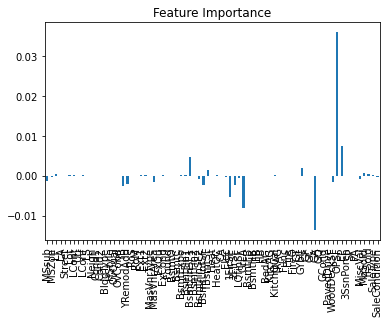

In [83]:
features_df = pd.DataFrame(features_dict, index=[0])
features_df.T.plot.bar(title="Feature Importance", legend=False);

# Conclusion

#### References and other Github links
https://github.com/sharmasapna/house-price-prediction/blob/master/house-price-first-attempt.ipynb

https://medium.com/codex/house-price-prediction-with-machine-learning-in-python-cf9df744f7ff#:~:text=To%20predict%20the%20sale%20prices,lastly%20Elastic%20Net%20regression%20algorithm.